In [4]:
#python libraries
import os, sys
import numpy as np               # for handling arrays
import h5py as h5                # for reading the COMPAS data
import time                      # for finding computation time
import matplotlib.pyplot as plt  #for plotting

# Import COMPAS specific scripts
compasRootDir = os.environ['COMPAS_ROOT_DIR']
sys.path.append(compasRootDir + 'postProcessing/PythonScripts')
from COMPAS.misc.unsupported_utils.compasUtils import printCompasDetails, getEventHistory, getEventStrings

# Choose an output hdf5 file to work with
pathToData = 'COMPAS_Output_1/COMPAS_Output.h5'

# This is known as an ipython magic command, and allows plots to be produced within the notebook
%matplotlib inline

In [5]:
Data  = h5.File(pathToData)
print(list(Data.keys()))

['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Run_Details']


In [6]:
SPs = Data['BSE_System_Parameters']
MTs = Data['BSE_RLOF']
CEs = Data['BSE_Common_Envelopes']
SNe = Data['BSE_Supernovae']
DCs = Data['BSE_Double_Compact_Objects']
print(SPs.keys())


<KeysViewHDF5 ['CE_Alpha', 'CH_on_MS(1)', 'CH_on_MS(2)', 'Eccentricity@ZAMS', 'Equilibrated_At_Birth', 'Error', 'Evolution_Status', 'LBV_Factor', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'Merger', 'Merger_At_Birth', 'Metallicity@ZAMS(1)', 'Metallicity@ZAMS(2)', 'Omega@ZAMS(1)', 'Omega@ZAMS(2)', 'Record_Type', 'SEED', 'SN_Kick_Magnitude_Random_Number(1)', 'SN_Kick_Magnitude_Random_Number(2)', 'SemiMajorAxis@ZAMS', 'Sigma_Kick_CCSN_BH', 'Sigma_Kick_CCSN_NS', 'Sigma_Kick_ECSN', 'Sigma_Kick_USSN', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Stellar_Type@ZAMS(1)', 'Stellar_Type@ZAMS(2)', 'Unbound', 'WR_Factor']>


In [10]:
print(DCs.keys())

<KeysViewHDF5 ['Coalescence_Time', 'Eccentricity@DCO', 'Mass(1)', 'Mass(2)', 'Merges_Hubble_Time', 'Record_Type', 'Recycled_NS(1)', 'Recycled_NS(2)', 'SEED', 'SemiMajorAxis@DCO', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Time']>


In [13]:
totMass = []
for i, seed in enumerate(DCs['SEED']):
    m1 = DCs['Mass(1)'][i]
    m2 = DCs['Mass(2)'][i]
    if m1 > 3 and m2 > 3:
        totMass.append(m1 + m2)
print(totMass)

[23.565127714081648, 17.29670487111397, 22.226088060798872, 25.598926566423692, 14.264043905387894, 22.848511552114623, 20.11849936196144, 22.50918303545052, 14.850688275130778, 21.758019876684912, 26.966167875499885, 22.179516297909245, 18.535730339661825, 24.023940003884995, 12.627792276979257, 15.089367942056521, 21.803332734998065, 25.0214989730134, 23.668373419057687, 22.42595724559322, 24.34982837142327, 30.071635786464835, 22.42616227059991, 22.37959620457374, 27.050280226173108, 26.95042462544595, 26.507805251685483, 20.05447730590935, 20.988816887880297, 26.90449843148444, 20.990234995764354, 15.174273147828483, 17.231367507471624, 16.973687963049173, 21.65851722835712, 22.736681041154295, 22.516304531108183, 31.21741230916097, 16.928420563901387, 19.59214940289887, 20.20775147406389, 19.31350632078977, 19.596162100628028, 22.91434477662158, 18.80262072272006, 18.758756675079326, 22.993342143300875, 24.437413183730136, 24.060685799226228, 14.649697253040978, 19.37613443614312,

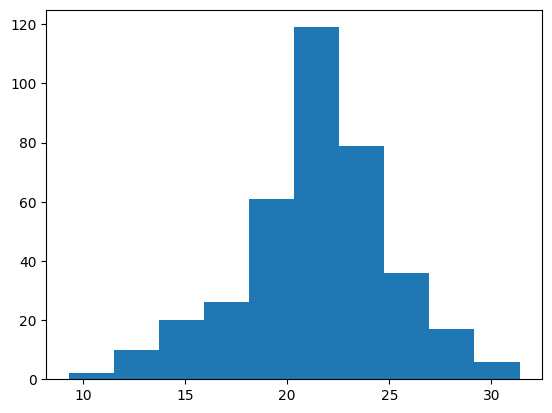

In [16]:
fig, ax = plt.subplots()
ax.hist(totMass);

In [25]:
coTime = []
coTotMass = []
for i in range(len(DCs['Coalescence_Time'])):
    if DCs['Merges_Hubble_Time'][i]:
        print(DCs['Coalescence_Time'][i])
        coTime.append(DCs['Coalescence_Time'][i])
        coTotMass.append(DCs['Mass(1)'][i] + DCs['Mass(2)'][i])

6993.879198929622
87.56310345330458
5950.432886859379
541.5037554182185
492.866010052929
584.3273241048626
2.0154919497892423
2630.207921447461
20.481140449439405
801.9766542991827
6977.778112330331
2.458999296662169
2309.4367920652785
1690.9824575331918
7214.429312221768
65.9395121967274
144.1329834462605
313.97234311749213
4938.272522902908
62.228265422062066
1517.2796545323208
609.4404702787664
69.23976085693086
11385.267091527237
609.5206896436539
73.4061737296381
49.897558109737766
59.44966393902687
351.5633016274172
3097.1682305860845
5.119229705058507


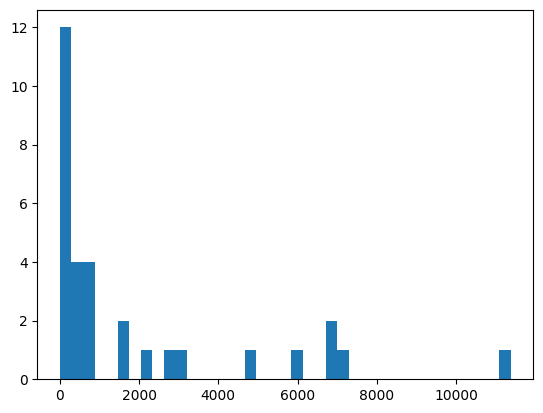

In [26]:
fig, ax = plt.subplots()
bins = np.linspace(0, max(coTime), 40)
ax.hist(coTime, bins=bins);

[None,
 Text(0.5, 0, 'Total System Mass ($M_\\odot$)'),
 Text(0, 0.5, 'Coalescence Time (Myr)')]

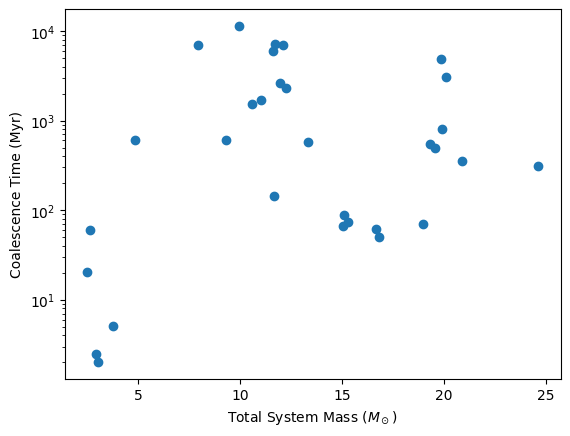

In [31]:
fig, ax = plt.subplots()
ax.scatter(coTotMass, coTime)
ax.set(yscale='log', xlabel="Total System Mass ($M_\odot$)", ylabel="Coalescence Time (Myr)")